# Plot the Generalization Gap
For each model, plot three splits

In [152]:
import json
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

In [153]:
def load_json(f):
    return json.load(open(f))

In [154]:
res_all = load_json('save_data/alllab_res_macrof1_splits.json') #, columns = ['model', 'split', 'macro_f1']
res_ood = load_json('save_data/ood_res_macrof1_splits.json') # columns = ['model', 'split', 'macro_f1']
res_map_all = {(k[0], k[1]):k[2] for k in res_all}
res_map_ood = {(k[0], k[1]):k[2] for k in res_ood}

In [155]:
fpath = Path(mpl.get_data_path(), "/storage_fast/rhshui/resource/arial-font/arial.ttf")
def set_texts_font(texts, f_name, f_size):
    for text in texts:
        text.set_font(f_name)
        text.set_fontsize(f_size)

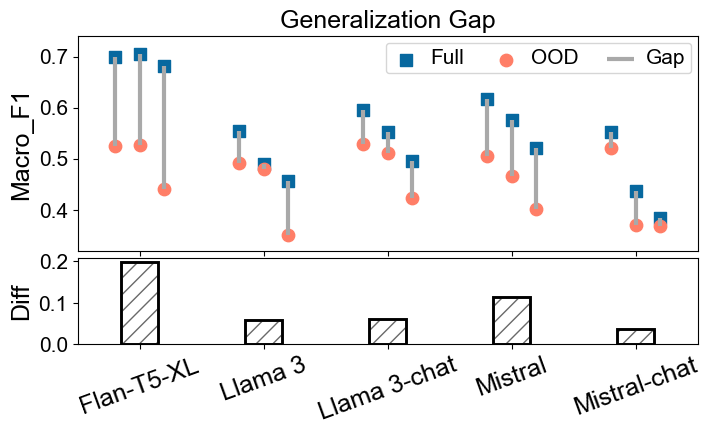

In [163]:
model_names = ['flan-t5-xl', 'llama3', 'llama3_chat', 'mistral', 'mistral_chat']
model_dp_names = ['Flan-T5-XL', 'Llama 3', 'Llama 3-chat','Mistral', 'Mistral-chat']

# fig, axes = plt.subplots(2,1, figsize=(8,5))
fig = plt.figure(figsize=(8,4))
spec = gridspec.GridSpec(ncols=1, nrows=2, wspace=0.1,
                         hspace=0.05, height_ratios=[2.5, 1])

# First plot details of each split
ax = fig.add_subplot(spec[0])
x_tick_pos = 1 + 2 * np.arange(len(model_names))
dlt_split = 0.4
mid_x_ticks = x_tick_pos + dlt_split
ylims = [0.32, 0.74]
xlims = [x_tick_pos[0]-1+ dlt_split, x_tick_pos[-1] + 1+ dlt_split]
gaps = []

for mi, (model, m_name) in enumerate(zip(model_names, model_dp_names)):
    splits = ['seed42_tr29', 'seed89_tr29', 'seed128_tr29']
    y_id = [res_map_all.get((model, split), 0) for split in splits]
    y_ood = [res_map_ood[(model, split)] for split in splits]
    gaps.append(np.mean([y1 - y2 for y1, y2 in zip(y_id, y_ood)]))
    x = x_tick_pos[mi] + np.arange(len(splits)) * dlt_split
    dot_id = ax.scatter(x, y_id, marker = 's', c = '#07689f', s = 80, label = 'ID')
    dot_ood = ax.scatter(x, y_ood, marker = 'o', c = '#ff7e67', s = 80, label = 'OOD')

    # plot the vertical var
    for xi, y1, y2 in zip(x, y_id, y_ood):
        vl = ax.vlines(xi, y2, y1, colors = 'darkgray', linestyles='solid', linewidth = 3)
        
lgd = ax.legend((dot_id, dot_ood, vl), ['Full', 'OOD', 'Gap'], ncols = 3)

ylab = ax.set_ylabel('Macro_F1', fontsize = 20)
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.set_xticks(mid_x_ticks, [])
title = ax.set_title('Generalization Gap')

# set font
set_texts_font([title], fpath, 18)
set_texts_font([ylab], fpath, 18)

set_texts_font(ax.get_yticklabels(), fpath, 15)
set_texts_font(lgd.texts, fpath, 15)

# Plot second fig of gap bar
ax = fig.add_subplot(spec[1])
ax.bar(mid_x_ticks, np.array(gaps), width=0.6, color = 'none',
       linewidth = 2., edgecolor = 'dimgray',
       hatch = '//')
ax.bar(mid_x_ticks, np.array(gaps), width = 0.6, color = 'none',
       ec = 'k', zorder = 1, lw = 2.,)
ax.set_xlim(xlims)
ax.set_xticks(mid_x_ticks, model_dp_names, rotation = 20)
ylab = ax.set_ylabel('Diff')
# set font
set_texts_font([ylab], fpath, 18)
set_texts_font(ax.get_xticklabels(), fpath, 18)
set_texts_font(ax.get_yticklabels(), fpath, 15)

plt.savefig('./fig/fig_gen_gap.pdf', bbox_inches='tight')
plt.show()

In [127]:
spec[0]

GridSpec(2, 1, height_ratios=[3, 1])[0:1, 0:1]